# 深度学习实验一:PyTorch Tensor

本次实验中，练习PyTorch Tensor的操作。请按以下要求完成编程：

In [1]:
name = '王浩南'#填写你的姓名
sid = 'E02014154'#填写你的学号

print('姓名:%s, 学号:%s'%(name, sid))

姓名:王浩南, 学号:E02014154


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## 1. 创建和操作Tensor

在这一部分，你将要用tensor创建张量，并对张量做一些处理。
请按照以下要求编写代码：

In [3]:
#创建一个shape=(5,10)的随机张量，张量的元素满足标准高斯分布

X = torch.randn((5,10))

print(X)

tensor([[ 0.1528, -0.7808,  0.0709,  0.9548, -0.3975, -1.0421, -1.5294,  1.3934,
         -1.2246, -0.6121],
        [ 0.3812,  0.3341,  0.7869,  0.9300,  0.9517, -0.9205,  1.0103,  0.2382,
         -0.6099, -0.9010],
        [ 1.6193,  2.3230,  1.7311, -0.3518, -1.2962,  0.2362, -1.0087, -0.1438,
         -1.5430, -0.3510],
        [ 0.4162, -2.5770,  1.2322,  1.7247,  0.3088,  1.1346, -0.9778, -0.0573,
          0.7007,  0.2610],
        [ 0.3120,  0.8889, -0.5498,  0.8636, -1.2631,  0.9344,  1.5174,  0.6589,
         -0.2966,  0.3450]])


In [4]:
#在下面输出X的形状、维度

print(X.shape)
print(X.dim())

torch.Size([5, 10])
2


假设$X$的每一列表示一个特征向量$X^{(i)}$，请在下面对X做标准化处理,即：

$X_{j}^{(i)}=\frac{X_{j}^{(i)}-\mu_{j}}{\sigma_{j} + \varepsilon}$

其中,$\mu$是样本均值向量，$\sigma$是样本的标准差向量，$\varepsilon$是一个很小的正数，可以取为$1e-7$。

In [5]:
#请在下面编写代码将X做标准化，得到张量Y

Y =  exp=1e-7
mean=torch.mean(X,dim=1,keepdim=True)#dim=0为列，1为行，keepdim=true是保持计算前后的维度不变
std=torch.std(X,dim=1,keepdim=True)
Y = (X-mean)/(std+exp)

print(Y)

tensor([[ 0.4806, -0.5071,  0.3939,  1.3292, -0.1017, -0.7836, -1.2992,  1.7932,
         -0.9767, -0.3286],
        [ 0.2105,  0.1490,  0.7407,  0.9277,  0.9560, -1.4904,  1.0325,  0.0236,
         -1.0845, -1.4650],
        [ 1.1140,  1.6374,  1.1971, -0.3520, -1.0544,  0.0853, -0.8406, -0.1973,
         -1.2380, -0.3515],
        [ 0.1615, -2.2611,  0.8220,  1.2206,  0.0746,  0.7430, -0.9667, -0.2217,
          0.3918,  0.0359],
        [-0.0350,  0.6609, -1.0747,  0.6303, -1.9352,  0.7157,  1.4191,  0.3834,
         -0.7693,  0.0048]])


In [6]:
#在下面编写代码输出Y的均值和每个维度的最大、最小值

miu = torch.mean(Y, dim=1, keepdim=True) #计算Y的行均值，请用一行代码实现

maxV = torch.max(Y, dim=1, keepdim=True)#计算Y的行最大值，请用一行代码实现

minV = torch.min(Y, dim=1, keepdim=True)#计算Y的行最小值，请用一行代码实现


In [7]:
#下面的代码构造了一个3维张量a
a = torch.tensor([[[1,2,3],[4,5,6]],[[-3,-4,-5],[-6,-7,-8]],[[7,8,9],[10,11,12]]])
print(a)
print(a.shape)
print(a.dim())

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[-3, -4, -5],
         [-6, -7, -8]],

        [[ 7,  8,  9],
         [10, 11, 12]]])
torch.Size([3, 2, 3])
3


In [8]:
#请在下面编写代码，对a进行操作，得到如下的张量:
'''tensor([[[ 1, -3,  7],
         [ 4, -6, 10]],

        [[ 2, -4,  8],
         [ 5, -7, 11]],

        [[ 3, -5,  9],
         [ 6, -8, 12]]])'''

b = a.permute((2,1,0))#请用一行代码实现
print(b)

tensor([[[ 1, -3,  7],
         [ 4, -6, 10]],

        [[ 2, -4,  8],
         [ 5, -7, 11]],

        [[ 3, -5,  9],
         [ 6, -8, 12]]])


In [9]:
#下面的代码读入一张彩色图像
import cv2 as cv
im = cv.imread('car0.jpg')

print(im.shape)
#opencv读入的图像是一个numpy ndarray
type(im)

(600, 1200, 3)


numpy.ndarray

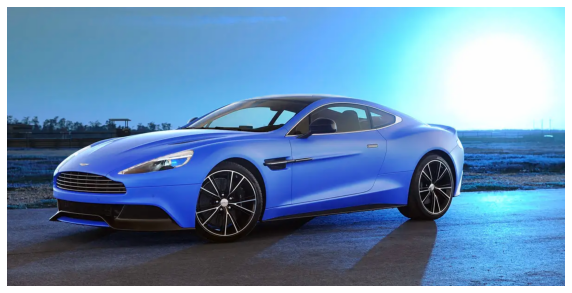

In [10]:
#显示彩色图像，注意显示的颜色是错误的，
#原因是opencv读入的图像三个颜色通道是B,G,R，不是R,G,B。而matplotlib绘制图像的时候，当作R,G,B绘制。

plt.figure(figsize = (10,6))
plt.imshow(im)
plt.axis('off')
plt.show()

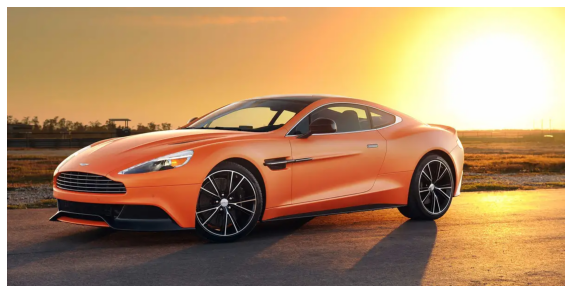

In [11]:
#下面的代码把im在第2个维度上翻转，把BGR变换为RGB,结果可以正常显示
im1 = np.flip(im,axis = 2)
plt.figure(figsize = (10,6))
plt.imshow(im1)
plt.axis('off')
plt.show()

In [12]:
#在下面编写代码，把im转换为一个张量
im_tensor = torch.tensor(im)#请用一行代码实现

im_tensor.shape

torch.Size([600, 1200, 3])

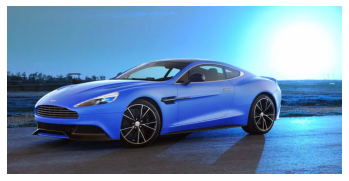

In [13]:
im2 = im_tensor.numpy()
plt.imshow(im2)
plt.axis('off')
plt.show()

In [14]:
#在下面用张量操作，把三个通道的顺序从BGR转换为RGB
im_t1 = torch.flip(im_tensor,[2]) #请用一行代码实现,提示：torch.flip

im_t1.shape

torch.Size([600, 1200, 3])

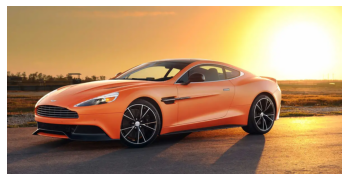

In [15]:
im3 = im_t1.numpy()
plt.imshow(im3)
plt.axis('off')
plt.show()

In [16]:
#请在下面编写代码，从im_t1中分离出三个通道:
R,G,B = torch.dsplit(im_t1,3) #请用一行代码实现，提示torch.dsplit

print(R.shape)

torch.Size([600, 1200, 1])


In [17]:
#请在下面编写代码，把R,G,B三个张量水平拼成一个张量

RGB = torch.hstack([R,G,B]) #请用一行代码实现，提示torch.hstack

print(RGB.shape)

torch.Size([600, 3600, 1])


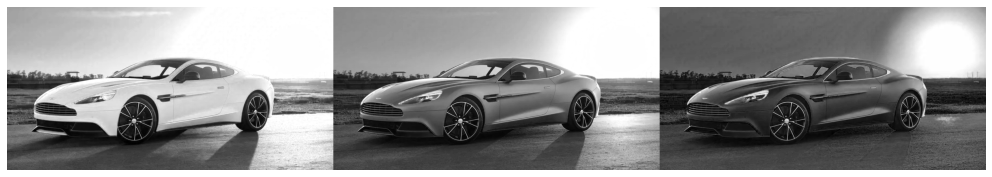

In [18]:
plt.figure(figsize=(18,3))
plt.imshow(RGB,cmap = 'gray')
plt.axis('off')
plt.show()

In [19]:
#在下面编写代码将im_t1中的彩色图像转换为灰度图
#转换公式为:GRAY = 0.3*r+0.59*G+0.11*B
#请使用广播实现

weights =torch.tensor([0.3,0.59,0.11]) #构造一个权值张量，表示R,G,B通道的权重

gray =torch.sum(weights*im_t1,dim=2) #用权值张量把im_t1转换为灰度图，可能需要多行代码实现


gray.shape

torch.Size([600, 1200])

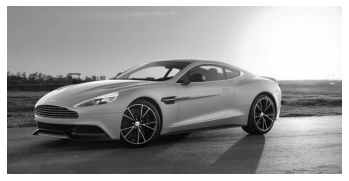

In [20]:
plt.imshow(gray.numpy(),cmap = 'gray')
plt.axis('off')
plt.show()

In [21]:
#im_t1的数据元素类型是unit8
im_t1.dtype

torch.uint8

In [22]:
#请把im_t1的数据类型转换为torch.float32,并归一化到[0,1]区间

im_t2 =  im_t1.to(torch.float32)/255#请用一行代码实现，提示Tensor.to

print(im_t2.shape)
print(im_t2[0,0,0])

torch.Size([600, 1200, 3])
tensor(0.6275)


In [23]:
#向im_t2中添加随机高斯噪声
#噪声均值为0，标准差为std
std = 0.02

im_t3 = torch.normal(0,0.02,size=(600,1200,3))+im_t2 #请用一行代码实现

print(im_t3[0,0,0])

print(im_t3.max())

tensor(0.6410)
tensor(1.0894)


In [24]:
#把im_t3的值截取到[0,1]区间
im_t3 =  torch.clamp(im_t3,0,1)#请用一行代码实现，提示torch.clamp


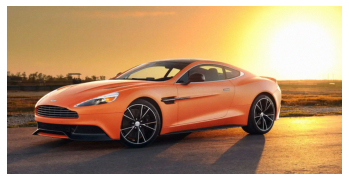

In [25]:
plt.imshow(im_t3.numpy())
plt.axis('off')
plt.show()

## 2. 用Tensor编写神经元模型

一个神经元表示以下函数：$h(x)=f(W^{T}x+b)$.其中$f$是非线性响应函数。

请用Tensor编写一个对率回归模型，并用梯度下降法训练该模型。

In [26]:
#定义sigmoid函数:
def sigmoid(z):
    rho = 1/(1 + torch.exp(-z))#请用一行代码实现，提示torch.exp
    return rho

In [27]:
t = torch.tensor([-5,-1,0,10],dtype = torch.float32)
print(sigmoid(t))

tensor([0.0067, 0.2689, 0.5000, 1.0000])


In [28]:
#定义一个表示logistic regression的函数:
def logReg(X,W,b):
    #计算净响应
    z = W.T@X+b#请用一行代码实现，提示@
    rho = sigmoid(z)
    return rho

In [29]:
W = torch.zeros((2,1))
b = 0
X = torch.randn((2,10))
print(logReg(X,W,b))

tensor([[0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
         0.5000]])


In [30]:
#生成随机样本:
X0 = torch.randn((2,100))*0.7 + torch.ones((2,1),dtype = torch.float32)
X1 = torch.randn((2,100))*0.7 - torch.ones((2,1),dtype = torch.float32)
X = torch.hstack((X0,X1))
Y = torch.hstack((torch.zeros((1,100)), torch.ones((1,100))))

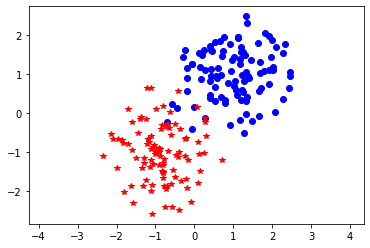

In [31]:
x0 = X0.numpy()
x1 = X1.numpy()
plt.plot(x0[0],x0[1],'bo')
plt.plot(x1[0],x1[1],'r*')
plt.axis('equal')
plt.show()

In [32]:
#在下面编写函数，训练一个对率回归模型

def trainLogReg(X,Y):
    #初始化W，b:
    W = torch.zeros((X.shape[0],1))
    b = 0
    
    #学习速率:
    alpha = 0.5
    
    epsilon = 1e-5
    
    #初始损失
    loss0 = np.inf
    iter = 1
    while(True):
        #计算预测值rho
        rho = logReg(X,W,b) #请用一行代码实现
        
        #在下面计算log-loss
        loss = (-torch.log(rho[Y==1]).sum() - torch.log(1-rho[Y==0]).sum()) / Y.shape[1]
        loss = loss.item()
        
        print('iter = %d, loss = %.5f'%(iter, loss))
        iter = iter + 1
        
        if(np.abs(loss - loss0)<epsilon):
            break
        loss0 = loss
        
        #计算误差err
        err = rho - Y #请用一行代码实现
        
        #计算梯度:
        dW = ((err@X.T)/Y.shape[1]).T#请用一行代码实现
        db = err.mean()#请用一行代码实现
        
        #梯度下降
        W = W - alpha * dW
        b = b - alpha * db
        
    return W,b

In [33]:
W,b = trainLogReg(X,Y)

iter = 1, loss = 0.69315
iter = 2, loss = 0.49032
iter = 3, loss = 0.38477
iter = 4, loss = 0.32274
iter = 5, loss = 0.28220
iter = 6, loss = 0.25360
iter = 7, loss = 0.23229
iter = 8, loss = 0.21574
iter = 9, loss = 0.20250
iter = 10, loss = 0.19164
iter = 11, loss = 0.18255
iter = 12, loss = 0.17482
iter = 13, loss = 0.16817
iter = 14, loss = 0.16236
iter = 15, loss = 0.15726
iter = 16, loss = 0.15273
iter = 17, loss = 0.14867
iter = 18, loss = 0.14502
iter = 19, loss = 0.14172
iter = 20, loss = 0.13872
iter = 21, loss = 0.13597
iter = 22, loss = 0.13345
iter = 23, loss = 0.13113
iter = 24, loss = 0.12898
iter = 25, loss = 0.12698
iter = 26, loss = 0.12513
iter = 27, loss = 0.12339
iter = 28, loss = 0.12177
iter = 29, loss = 0.12026
iter = 30, loss = 0.11883
iter = 31, loss = 0.11749
iter = 32, loss = 0.11622
iter = 33, loss = 0.11502
iter = 34, loss = 0.11389
iter = 35, loss = 0.11281
iter = 36, loss = 0.11179
iter = 37, loss = 0.11082
iter = 38, loss = 0.10990
iter = 39, loss = 0.1

In [34]:
print('W = ', W)
print('b = ', b)

W =  tensor([[-2.8370],
        [-3.1614]])
b =  tensor(-0.1036)


In [35]:
#绘制分界面：

W0 = W.numpy()
b0 = b.item()

maxx = torch.max(X,dim = 1).values[0].item()
minx = torch.min(X,dim = 1).values[0].item()

In [36]:
print(maxx)
print(minx)

2.4533169269561768
-2.347611427307129


In [37]:
x = np.array([minx,maxx])
y = -(W0[0] * x + b0) / W0[1]

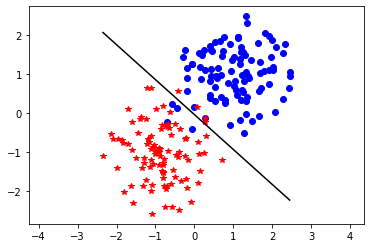

In [38]:
x0 = X0.numpy()
x1 = X1.numpy()
plt.plot(x0[0],x0[1],'bo')
plt.plot(x1[0],x1[1],'r*')
plt.plot(x,y,'k-')
plt.axis('equal')
plt.show()